# Cumulative Returns

Calculate yearly returns, and produce plots of trading strategy returns, based on model outputs.

In [12]:
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
pd.options.display.max_rows = 35
pd.options.display.max_columns = 43
%matplotlib inline

In [13]:
perf_data = pd.read_csv('monthly_returns.csv')
perf_data['Unnamed: 0'] = pd.to_datetime(perf_data['Unnamed: 0'], format='%Y%m')
perf_data = perf_data.set_index('Unnamed: 0')
perf_data['50_50_SMB_HML'] = (perf_data['SMB']+perf_data['HML'])/2

# Average Returns

Show average returns of all strategies and all models.

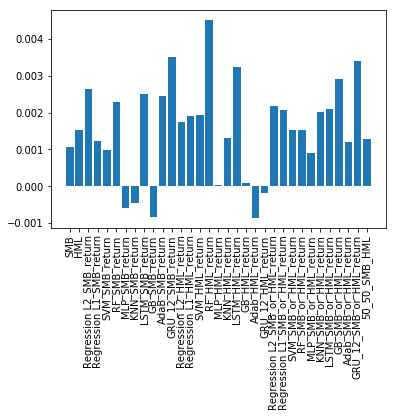

In [14]:
plt.bar(list(perf_data.columns.values),perf_data.mean())
plt.xticks(rotation=90)
plt.show()

# Cumulative Returns

Calculate cumulative returns and produce plots.

In [15]:
perf_data_log = perf_data + 1
perf_data_log = np.log(perf_data_log)
perf_data_log = perf_data_log.cumsum(axis=0)
perf_data_cumulative = np.exp(perf_data_log)

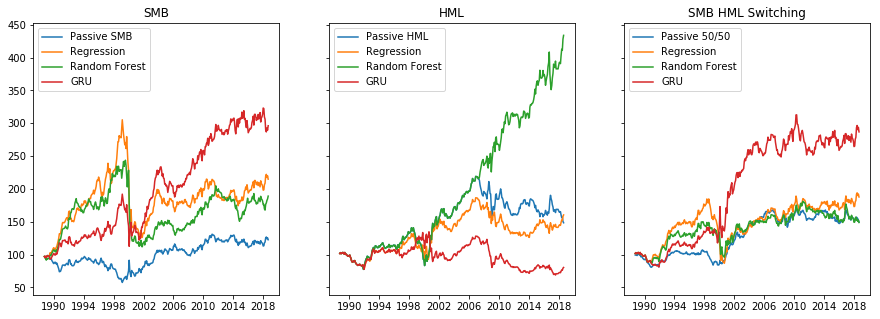

In [16]:
#Creates two subplots and unpacks the output array immediately
f, (ax1, ax2,ax3) = plt.subplots(1, 3, sharey=True,figsize=(15,5))

columns = ['SMB',
 'Regression L2_SMB_return',
 'RF_SMB_return',
 'GRU_12_SMB_return']

ax1.plot(perf_data_cumulative[columns]*100)
ax1.grid(which='y')
ax1.set_title('SMB')
ax1.legend(('Passive SMB','Regression','Random Forest','GRU'),loc='upper left')

columns = ['HML',
 'Regression L2_HML_return',
 'RF_HML_return',
 'GRU_12_HML_return']

ax2.plot(perf_data_cumulative[columns]*100)
ax2.legend(('Passive HML','Regression','Random Forest','GRU'),loc='upper left')
ax2.set_title('HML')

columns = ['50_50_SMB_HML',
 'Regression L2_SMB_or_HML_return',
 'RF_SMB_or_HML_return',
 'GRU_12_SMB_or_HML_return']

ax3.plot(perf_data_cumulative[columns]*100)
ax3.set_title('SMB HML Switching')
ax3.legend(('Passive 50/50','Regression','Random Forest','GRU'),loc='upper left')

plt.show()
f.savefig('returns_graph',dpi=500)

# Yearly Return

Break out returns by year.

In [17]:
yrly_re = perf_data_cumulative[['SMB','HML',
 'Regression L2_SMB_or_HML_return',
 'SVM_SMB_or_HML_return',
 'RF_SMB_or_HML_return',
 'MLP_SMB_or_HML_return',
 'GB_SMB_or_HML_return',
 'GRU_12_SMB_or_HML_return']]

year = 1
initial_start = 1
index = 0
ann_ret = pd.DataFrame()

for i in range(0,perf_data_cumulative.shape[0]//12):
    if i == 0:
        ann_ret[i]=perf_data_cumulative.iloc[12]-1
    else:
        a_return=(perf_data_cumulative.iloc[(i+1)*12-1]/perf_data_cumulative.iloc[(i)*12-1]-1)
        ann_ret[i] = a_return

ann_ret = ann_ret.transpose()
ann_ret

,SMB,HML,Regression L2_SMB_return,Regression L1_SMB_return,SVM_SMB_return,RF_SMB_return,MLP_SMB_return,KNN_SMB_return,LSTM_SMB_return,GB_SMB_return,AdaB_SMB_return,GRU_12_SMB_return,Regression L2_HML_return,Regression L1_HML_return,SVM_HML_return,RF_HML_return,MLP_HML_return,KNN_HML_return,LSTM_HML_return,GB_HML_return,Adab_HML_return,GRU_12_HML_return,Regression L2_SMB_or_HML_return,Regression L1_SMB_or_HML_return,SVM_SMB_or_HML_return,RF_SMB_or_HML_return,MLP_SMB_or_HML_return,KNN_SMB_or_HML_return,LSTM_SMB_or_HML_return,GB_SMB_or_HML_return,Adab_SMB_or_HML_return,GRU_12_SMB_or_HML_return,50_50_SMB_HML
0,-0.093329,-0.014554,0.052209,0.022129,0.052209,0.022129,0.096693,0.096693,0.007282,-0.017182,0.050738,-0.031447,-0.014554,-0.014554,-0.014554,-0.014554,-0.014554,-0.014554,-0.014554,0.016476,-0.066175,-0.014554,-0.014554,-0.014554,-0.014554,-0.014554,-0.065551,-0.038614,-0.014554,-0.029584,-0.063271,-0.014554,-0.053882
1,-0.165901,-0.089894,0.225227,0.225227,0.225227,0.178832,-0.034164,0.190680,0.190680,0.070241,0.075614,0.190680,-0.089894,-0.089894,-0.089894,-0.089894,-0.089894,-0.118030,-0.089894,-0.002356,0.019229,-0.089894,-0.089894,-0.089894,-0.089894,-0.089894,-0.082286,-0.172423,-0.089894,-0.115679,-0.177301,-0.089894,-0.127501
2,0.097978,-0.087752,0.240833,0.240833,0.240833,0.209225,-0.034176,-0.096736,0.141995,-0.057045,-0.065494,0.061561,-0.087752,-0.087752,-0.087752,-0.087752,-0.053933,0.056293,-0.087752,-0.134498,-0.116836,-0.087752,0.075620,-0.087752,-0.087752,0.053858,-0.087752,-0.054210,0.078108,-0.049961,-0.106209,-0.087752,0.002611
3,-0.029039,0.158776,-0.031366,-0.039853,-0.036583,0.196393,0.016845,0.180467,-0.010606,-0.031366,0.181405,-0.029039,0.109942,0.203160,0.158776,0.158776,-0.119714,0.168784,-0.015532,-0.036643,0.005520,0.109942,0.157474,0.085178,0.158776,0.158776,0.105486,0.158776,-0.029039,0.074288,0.158776,0.069606,0.063717
4,0.119344,0.173445,0.163654,0.129916,0.116902,-0.018117,-0.036211,-0.075866,0.039492,0.053505,0.029979,0.084520,0.146981,0.090595,0.173445,0.173445,0.173445,0.173445,0.173445,-0.001043,-0.013325,0.147665,0.237763,0.171033,0.173445,0.173445,0.129187,0.223187,0.119344,0.180236,0.154504,0.295114,0.149226
5,0.020214,0.000265,0.039368,0.039368,0.034390,0.114963,0.020214,-0.105792,0.020214,-0.012134,-0.011134,0.039368,0.000265,0.005681,0.000265,0.000265,0.000265,0.000265,0.000265,-0.002334,-0.098547,0.000265,0.067665,0.088701,0.000265,0.000265,0.000265,-0.016489,0.071812,0.000183,-0.020971,0.005654,0.011432
6,-0.044421,0.005166,0.122300,0.122300,-0.088127,-0.045185,-0.127033,-0.000435,0.047677,0.076348,0.042447,0.032688,0.005166,0.005166,0.005166,0.005166,0.046185,-0.000257,0.004353,-0.019666,0.033918,0.005166,-0.005697,-0.005697,0.005166,0.005166,0.072679,0.005166,0.046634,-0.013674,0.017444,-0.013305,-0.018899
7,-0.022585,-0.020110,-0.056605,0.013450,-0.073064,0.031678,-0.101025,0.115641,-0.048841,0.157415,0.054389,-0.038299,-0.020110,0.003693,-0.020110,-0.020110,0.065162,0.026653,-0.020110,0.008541,-0.027918,-0.020110,-0.020110,-0.020110,-0.020110,-0.020110,-0.022585,-0.020110,-0.020110,-0.047922,-0.052362,-0.020110,-0.018454
8,-0.034292,0.145918,0.083946,-0.008217,-0.134204,0.178058,-0.034292,-0.037156,0.044345,0.016682,0.227387,0.016724,0.145918,0.087632,0.145918,0.145918,0.145918,0.145918,0.145918,0.049292,0.145918,-0.030077,0.145918,0.145918,0.145918,0.170202,-0.078202,0.144605,-0.088467,0.136276,0.068679,0.145918,0.056769
9,-0.243252,0.073166,0.306840,0.282500,0.282500,0.094079,-0.243252,0.265176,0.306840,-0.043815,-0.153160,0.306840,0.073166,0.073166,0.073166,0.073166,0.073166,0.073166,0.073166,0.011475,-0.034024,0.073166,0.073166,-0.218980,0.073166,-0.037941,0.073166,0.073166,0.073166,-0.209013,-0.141200,0.073166,-0.096025
